In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df=pd.read_csv("health_patient_data.csv")
df.drop("PatientID",axis=1,inplace=True)
df

,Age,BMI,Glucose,BloodPressure,Insulin,Diabetes
0,58,37.1,132.4,83.7,59.0,1
1,48,29.9,89.0,68.7,1.4,0
2,34,26.1,134.1,73.5,60.3,1
3,62,18.4,93.2,82.0,93.8,1
4,27,19.8,164.6,72.2,90.5,1
...,...,...,...,...,...,...
795,24,20.2,112.5,60.3,96.7,0
796,50,34.9,105.2,70.8,95.3,1
797,24,26.2,88.7,85.4,47.1,0
798,57,26.3,80.1,72.3,101.2,1


In [9]:
x=df.drop("Diabetes",axis=1)
y=df["Diabetes"]

In [10]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 0.91930143,  1.52874051,  0.76766982,  0.89700454, -0.51091107],
       [ 0.21888129,  0.32884607, -0.69548151, -0.62613887, -1.95072211],
       [-0.7617069 , -0.30443155,  0.8249822 , -0.13873298, -0.47841534],
       ...,
       [-1.46212704, -0.28776635, -0.70559546,  1.06962746, -0.80837203],
       [ 0.84925942, -0.27110115, -0.99552867, -0.26058445,  0.54395049],
       [-1.60221106,  0.76214128, -0.75953652,  1.07978175,  1.63630712]],
      shape=(800, 5))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

In [12]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1])

In [14]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8625

In [15]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[41, 14],
       [ 8, 97]])

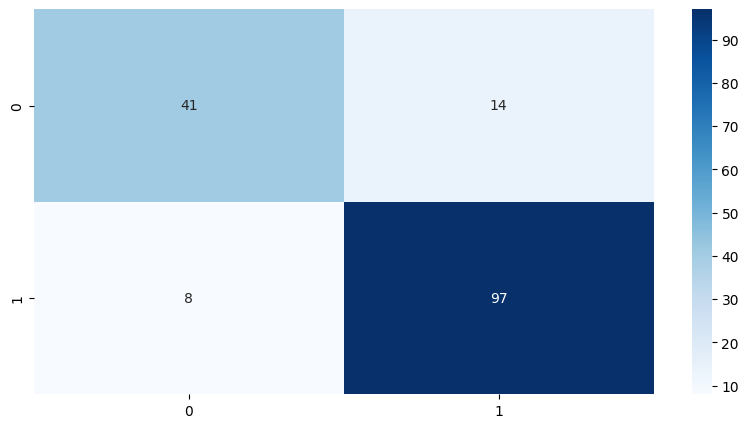

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()